## Importing libraries

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [80]:
import random
from scipy import ndarray

In [81]:
%config InlineBackend.figure_format = 'svg'

In [82]:
palette = ['paleturquoise','c']

## Import dataset

In [83]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['ozone_level']

In [84]:
data.data.shape

(2536, 72)

In [85]:
len(data.data)

2536

In [86]:
def unison_shuffled_copies(a, b):
    np.random.seed(1)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [87]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [88]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([2463,   73], dtype=int64))


In [89]:
features=data.data
features.shape

(2536, 72)

In [90]:
n_feat=len(features[1])

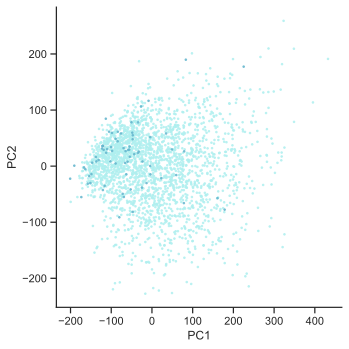

In [91]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

32

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

4145

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE 

In [58]:
def OVS(training_data,training_labels,neb):
    
    smote_mot2ld = sv.MOT2LD(random_state=62, k = neb)
    SMOTE_feat_mot2ld, SMOTE_labels_mot2ld = smote_mot2ld.sample(training_data, training_labels)
    
    smote_dbsmote = sv.DBSMOTE(random_state=62, )
    SMOTE_feat_dbsmote, SMOTE_labels_dbsmote = smote_dbsmote.sample(training_data, training_labels)
    
    smote_cure = sv.CURE_SMOTE(random_state=62, )
    SMOTE_feat_cure, SMOTE_labels_cure = smote_cure.sample(training_data, training_labels)
    
    smote_SOMO = sv.SOMO(random_state=62)
    SMOTE_feat_SOMO, SMOTE_labels_SOMO = smote_SOMO.sample(training_data, training_labels)
    
    sm = SMOTE(random_state=62, k_neighbors=neb, sampling_strategy=1)
    SMOTE_feat, SMOTE_labels = sm.fit_resample(training_data,training_labels)
    
    
    return(SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote,\
          SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO)

In [59]:
LR=[]
SVM=[]
KNN=[] 
LR_SM=[]
SVM_SM=[]
KNN_SM=[]
LR_MOT2TLD=[]
SVM_MOT2TLD=[]
KNN_MOT2TLD=[] 
LR_DBSMOTE=[]
SVM_DBSMOTE=[]
KNN_DBSMOTE=[] 
LR_CURE=[]
SVM_CURE=[]
KNN_CURE=[] 
LR_SOMO=[]
SVM_SOMO=[]
KNN_SOMO=[] 



i=0
while i<10:
    SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote, SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO=OVS(training_folds_feats[i],training_folds_labels[i],5)
    
    f1_lr, bal_acc_lr, aps_lr, mat_lr=lr(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    LR.append([f1_lr, aps_lr, bal_acc_lr])
    f1_svm,bal_acc_svm,aps_svm,mat_svm=svm(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    SVM.append([f1_svm,bal_acc_svm,aps_svm])
    f1_knn,bal_acc_knn,aps_knn,mat_knn=knn(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    KNN.append([f1_knn,bal_acc_knn,aps_knn])
    
    f1_lr_SMOTE,bal_acc_lr_SMOTE, aps_lr_SMOTE, mat_lr_SMOTE=lr(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_SM.append([f1_lr_SMOTE, bal_acc_lr_SMOTE, aps_lr_SMOTE])
    f1_svm_SMOTE,bal_acc_svm_SMOTE,aps_svm_SMOTE,mat_svm_SMOTE=svm(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SM.append([f1_svm_SMOTE, bal_acc_svm_SMOTE, aps_svm_SMOTE])
    f1_knn_SMOTE,bal_acc_knn_SMOTE, aps_knn_SMOTE, mat_knn_SMOTE=knn(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SM.append([f1_knn_SMOTE,bal_acc_knn_SMOTE,aps_knn_SMOTE])
        
    f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld, mat_lr_SMOTE_mot2ld=lr(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    LR_MOT2TLD.append([f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld])
    f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld, mat_svm_SMOTE_mot2ld=svm(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    SVM_MOT2TLD.append([f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld])
    f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld, mat_knn_SMOTE_mot2ld=knn(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    KNN_MOT2TLD.append([f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld])
    
    f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote, mat_lr_SMOTE_dbsmote=lr(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    LR_DBSMOTE.append([f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote])
    f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote, mat_svm_SMOTE_dbsmote=svm(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    SVM_DBSMOTE.append([f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote])
    f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote,mat_knn_SMOTE_dbsmote=knn(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    KNN_DBSMOTE.append([f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote])
    
    f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure,mat_lr_SMOTE_cure=lr(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    LR_CURE.append([f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure])
    f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure,mat_svm_SMOTE_cure=svm(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    SVM_CURE.append([f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure])
    f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure,mat_knn_SMOTE_cure=knn(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    KNN_CURE.append([f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure])
    
    f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO,mat_lr_SMOTE_SOMO=lr(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    LR_SOMO.append([f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO])
    f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO,mat_svm_SMOTE_SOMO=svm(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SOMO.append([f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO])
    f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO,mat_knn_SMOTE_SOMO=knn(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SOMO.append([f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO])

    i=i+1

2020-10-27 12:16:45,364:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:16:45,365:INFO:MOT2LD: starting TSNE n: 3760 d: 10


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.010s...
[t-SNE] Computed neighbors for 3760 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019845
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 92.7869644, gradient norm = 0.0760566 (50 iterations in 1.311s)
[t-SNE] Iteration 100: error = 76.8346558, gradient norm = 0.0298408 (50 iterations in 0.837s)
[t-SNE] Iteration 150: error = 72.8049927, gradient norm = 0.0169727 (50 iterations in 0.686s)
[t-SNE] Iteration 200: error = 70.7687912, gradient norm = 0.0151770 (50 iterations in 0.725s)
[t-SNE] Iteration 250: error = 69.4739914, gradient norm = 0.0137666 (50 iterations in 0.760s)
[t-SNE] KL divergence after 250 iterati

2020-10-27 12:16:53,846:INFO:MOT2LD: TSNE finished
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\smote_variants\_smote_variants.py:9931: RuntimeWarning: invalid value encountered in true_divide
  prob = prob/np.sum(prob)
2020-10-27 12:16:53,887:INFO:MOT2LD: Empty clustering
2020-10-27 12:16:53,888:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0761286, gradient norm = 0.0002217 (50 iterations in 0.785s)
[t-SNE] KL divergence after 500 iterations: 1.076129


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:16:54,088:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:16:54,169:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:16:54,235:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs fai

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.03170594837261504
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.022771862368135658
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.17146282973621102
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 327 87 1 2
balanced accuracy_LR: 0.7282608695652173
f1 score_LR: 0.043478260869565216
kappa: 0.029976209357652772
average_precision_score: 0.04140384076254556
confusion matrix_LR [[327  87]
 [  1   2]]
tn, fp, fn, tp: 236 178 1 2
balanced accuracy_SVM: 0.6183574879227053
f1 score_SVM: 0.021857923497267763
kappa: 0.007815926945009433
average_precision_score: 0.04399208947081287
confusion matrix_SVM [[236 178]
 [  1   2]]
tn, fp, fn, tp: 361 53 2 1
balanced accuracy_KNN: 0.6026570048309179
f1 score_KNN: 0.03508771929824561
kappa: 0.021753039027511134
average_precision_score: 0.03257394084732214
confusion matrix_KNN [[361  53]
 [  2   1]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.03170594837261504
confusion matrix_LR [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.006771145311625921
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.17146282973621102
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 341 73 1 2
balanced accuracy_LR: 0.7451690821256038
f1 score_LR: 0.05128205128205129
kappa: 0.03797231575009341
average_precision_score: 0.03456138552982169
confusion matrix_LR [[341  73]
 [  1   2]]
tn, fp, fn, tp: 248 166 1 2
balanced accuracy_SVM: 0.6328502415458936
f1 score_SVM: 0.023391812865497078
kappa: 0.009388469252763154
average_precision_score: 0.030593075198191995
confusion matrix_SVM [[248 166]
 [  1   2]]
tn, fp, fn, tp: 406 8 2 1
balanced accuracy_KNN: 0.6570048309178744
f1 score_KNN: 0.16666666666666666
kappa: 0.15757575757575748
average_precision_score: 0.17146282973621102
confusion matrix_KNN [[406   8]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 338 76 1 2
balanced accuracy_LR: 0.7415458937198067
f1 score_LR: 0.04938271604938271
kappa: 0.036026299198414824
average_precision_score: 0.05109890109890109
confusion matrix_LR [[338  76]
 [  1   2]]
tn, fp, fn, tp: 245 169 1 2
balanced accuracy_SVM: 0.6292270531400965
f1 score_SVM: 0.022988505747126436
kappa: 0.00897500419392716
average_precision_score: 0.061720142602495545
confusion matrix_SVM [[245 169]
 [  1   2]]
tn, fp, fn, tp: 384 30 2 1
balanced accuracy_KNN: 0.6304347826086957
f1 score_KNN: 0.0588235294117647
kappa: 0.046312178387650005
average_precision_score: 0.034126338347015554
confusion matrix_KNN [[384  30]
 [  2   1]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.03170594837261504
confusion matrix_LR [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 12:17:08,728:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:08,729:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.022771862368135658
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.17146282973621102
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.011s...
[t-SNE] Computed neighbors for 3760 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019667
[t-SNE] Computed conditional probabilities in 0.098s
[t-SNE] Iteration 50: error = 92.6931839, gradient norm = 0.0755025 (50 iterations in 1.337s)
[t-SNE] Iteration 100: error = 77.0005646, gradient norm = 0.0275998 (50 ite

2020-10-27 12:17:17,464:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.0838252, gradient norm = 0.0002204 (50 iterations in 0.789s)
[t-SNE] KL divergence after 500 iterations: 1.083825


2020-10-27 12:17:17,683:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:17:17,864:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:17,942:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:18,011:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.050179758513091845
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.02052767052767053
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 324 90 1 2
balanced accuracy_LR: 0.7246376811594203
f1 score_LR: 0.042105263157894736
kappa: 0.02856923431380065
average_precision_score: 0.06363554189641146
confusion matrix_LR [[324  90]
 [  1   2]]
tn, fp, fn, tp: 221 193 0 3
balanced accuracy_SVM: 0.7669082125603865
f1 score_SVM: 0.03015075376884422
kappa: 0.016208881880523607
average_precision_score: 0.05715811965811965
confusion matrix_SVM [[221 193]
 [  0   3]]
tn, fp, fn, tp: 363 51 2 1
balanced accuracy_KNN: 0.605072463768116
f1 score_KNN: 0.03636363636363637
kappa: 0.023073862882906693
average_precision_score: 0.04043226956896022
confusion matrix_KNN [[363  51]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 405 9 2 1
balanced accuracy_LR: 0.6557971014492754
f1 score_LR: 0.15384615384615383
kappa: 0.14437604924454395
average_precision_score: 0.11376698014629048
confusion matrix_LR [[405   9]
 [  2   1]]
tn, fp, fn, tp: 345 69 1 2
balanced accuracy_SVM: 0.75
f1 score_SVM: 0.054054054054054064
kappa: 0.04081230283911674
average_precision_score: 0.14814814814814817
confusion matrix_SVM [[345  69]
 [  1   2]]
tn, fp, fn, tp: 410 4 3 0
balanced accuracy_KNN: 0.49516908212560384
f1 score_KNN: 0.0
kappa: -0.008290155440414448
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[410   4]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 363 51 0 3
balanced accuracy_LR: 0.9384057971014492
f1 score_LR: 0.10526315789473684
kappa: 0.09289827255278305
average_precision_score: 0.1251082251082251
confusion matrix_LR [[363  51]
 [  0   3]]
tn, fp, fn, tp: 247 167 0 3
balanced accuracy_SVM: 0.7983091787439613
f1 score_SVM: 0.034682080924855495
kappa: 0.020837727253553706
average_precision_score: 0.08949285782762918
confusion matrix_SVM [[247 167]
 [  0   3]]
tn, fp, fn, tp: 398 16 3 0
balanced accuracy_KNN: 0.4806763285024155
f1 score_KNN: 0.0
kappa: -0.012265235722499046
average_precision_score: 0.019947678221059518
confusion matrix_KNN [[398  16]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 350 64 1 2
balanced accuracy_LR: 0.7560386473429952
f1 score_LR: 0.057971014492753624
kappa: 0.04482503435881158
average_precision_score: 0.06612576064908722
confusion matrix_LR [[350  64]
 [  1   2]]
tn, fp, fn, tp: 243 171 0 3
balanced accuracy_SVM: 0.7934782608695652
f1 score_SVM: 0.03389830508474576
kappa: 0.020037105751391504
average_precision_score: 0.07902541406214353
confusion matrix_SVM [[243 171]
 [  0   3]]
tn, fp, fn, tp: 385 29 1 2
balanced accuracy_KNN: 0.7983091787439613
f1 score_KNN: 0.1176470588235294
kappa: 0.10591766723842189
average_precision_score: 0.03977647375187407
confusion matrix_KNN [[385  29]
 [  1   2]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.050179758513091845
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 

2020-10-27 12:17:31,629:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:31,630:INFO:MOT2LD: starting TSNE n: 3760 d: 10


3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.02052767052767053
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.015s...
[t-SNE] Computed neighbors for 3760 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019682
[t-SNE] Computed conditional probabilities in 0.087s
[t-SNE] Iteration 50: error = 92.9554062, gradient norm = 0.0769556 (50 iterations in 1.293s)
[t-SNE] Iteration 100: error = 76.5533981, gradient norm = 0.0276961 (50 iterations in 0.964s)
[t-

2020-10-27 12:17:41,012:INFO:MOT2LD: TSNE finished
2020-10-27 12:17:41,172:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0678077, gradient norm = 0.0002237 (50 iterations in 0.755s)
[t-SNE] KL divergence after 500 iterations: 1.067808


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:17:41,335:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:41,409:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:41,474:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs fai

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.11906906906906906
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.031425954997383564
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 332 82 0 3
balanced accuracy_LR: 0.9009661835748792
f1 score_LR: 0.06818181818181818
kappa: 0.055048913944619415
average_precision_score: 0.12516087516087515
confusion matrix_LR [[332  82]
 [  0   3]]
tn, fp, fn, tp: 224 190 0 3
balanced accuracy_SVM: 0.7705314009661836
f1 score_SVM: 0.030612244897959183
kappa: 0.0166803187132325
average_precision_score: 0.1325825825825826
confusion matrix_SVM [[224 190]
 [  0   3]]
tn, fp, fn, tp: 367 47 2 1
balanced accuracy_KNN: 0.6099033816425121
f1 score_KNN: 0.0392156862745098
kappa: 0.026026026026026106
average_precision_score: 0.03721270229838161
confusion matrix_KNN [[367  47]
 [  2   1]]
tn, fp, fn, tp: 410 4 3 0
balanced accuracy_LR: 0.49516908212560384
f1 score_LR: 0.0
kappa: -0.008290155440414448
average_precision_score: 0.013725906614330072
confusion matrix_LR [[410   4]
 [  3   0]]
tn, fp, fn, tp: 328 86 2 1
balanced accuracy_SVM: 0.5628019323671497
f1 score_SVM: 0.022222222222222223
kappa: 0.008430609597924854
average_pr

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 365 49 2 1
balanced accuracy_LR: 0.607487922705314
f1 score_LR: 0.03773584905660377
kappa: 0.024494289252786627
average_precision_score: 0.01509785293910673
confusion matrix_LR [[365  49]
 [  2   1]]
tn, fp, fn, tp: 250 164 1 2
balanced accuracy_SVM: 0.6352657004830917
f1 score_SVM: 0.023668639053254437
kappa: 0.009672265641867184
average_precision_score: 0.015778786430960343
confusion matrix_SVM [[250 164]
 [  1   2]]
tn, fp, fn, tp: 404 10 3 0
balanced accuracy_KNN: 0.48792270531400966
f1 score_KNN: 0.0
kappa: -0.011191941801902638
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[404  10]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 337 77 1 2
balanced accuracy_LR: 0.7403381642512077
f1 score_LR: 0.048780487804878044
kappa: 0.03540925266903905
average_precision_score: 0.2195692883895131
confusion matrix_LR [[337  77]
 [  1   2]]
tn, fp, fn, tp: 193 221 0 3
balanced accuracy_SVM: 0.7330917874396136
f1 score_SVM: 0.026431718061674006
kappa: 0.012409580453303426
average_precision_score: 0.09946236559139784
confusion matrix_SVM [[193 221]
 [  0   3]]
tn, fp, fn, tp: 389 25 3 0
balanced accuracy_KNN: 0.46980676328502413
f1 score_KNN: 0.0
kappa: -0.013014055179593864
average_precision_score: 0.014897173170554466
confusion matrix_KNN [[389  25]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.11906906906906906
confusion matrix_LR [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 12:17:57,110:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:17:57,113:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.031425954997383564
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.011s...
[t-SNE] Computed neighbors for 3760 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019785
[t-SNE] Computed conditional probabilities in 0.090s
[t-SNE] Iteration 50: error = 92.7045593, gradient norm = 0.0772810 (50 iterations in 1.385s)
[t-SNE] Iteration 100: error = 77.6466522, gradient norm = 0.0265887 (50 it

2020-10-27 12:18:06,666:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.0862330, gradient norm = 0.0002228 (50 iterations in 0.769s)
[t-SNE] KL divergence after 500 iterations: 1.086233


2020-10-27 12:18:06,883:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:18:07,036:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:07,119:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:07,186:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.016338645213827815
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.006224533236027489
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 337 77 2 1
balanced accuracy_LR: 0.5736714975845411
f1 score_LR: 0.024691358024691357
kappa: 0.010988021255516456
average_precision_score: 0.02162485547578715
confusion matrix_LR [[337  77]
 [  2   1]]
tn, fp, fn, tp: 230 184 0 3
balanced accuracy_SVM: 0.7777777777777778
f1 score_SVM: 0.031578947368421054
kappa: 0.0176678445229681
average_precision_score: 0.023954997125728832
confusion matrix_SVM [[230 184]
 [  0   3]]
tn, fp, fn, tp: 361 53 1 2
balanced accuracy_KNN: 0.7693236714975845
f1 score_KNN: 0.06896551724137931
kappa: 0.056086519114688094
average_precision_score: 0.024043103179793825
confusion matrix_KNN [[361  53]
 [  1   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 396 18 3 0
balanced accuracy_LR: 0.4782608695652174
f1 score_LR: 0.0
kappa: -0.01248699271592102
average_precision_score: 0.018937528850592397
confusion matrix_LR [[396  18]
 [  3   0]]
tn, fp, fn, tp: 346 68 2 1
balanced accuracy_SVM: 0.5845410628019324
f1 score_SVM: 0.027777777777777776
kappa: 0.014184397163120477
average_precision_score: 0.030802636656355367
confusion matrix_SVM [[346  68]
 [  2   1]]
tn, fp, fn, tp: 411 3 3 0
balanced accuracy_KNN: 0.4963768115942029
f1 score_KNN: 0.0
kappa: -0.007246376811594235
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[411   3]
 [  3   0]]
tn, fp, fn, tp: 371 43 3 0
balanced accuracy_LR: 0.44806763285024154
f1 score_LR: 0.0
kappa: -0.013633481293595207
average_precision_score: 0.02098783817324398
confusion matrix_LR [[371  43]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 268 146 1 2
balanced accuracy_SVM: 0.6570048309178744
f1 score_SVM: 0.026490066225165566
kappa: 0.012564635383946254
average_precision_score: 0.018222878807133476
confusion matrix_SVM [[268 146]
 [  1   2]]
tn, fp, fn, tp: 408 6 3 0
balanced accuracy_KNN: 0.4927536231884058
f1 score_KNN: 0.0
kappa: -0.009685230024212954
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[408   6]
 [  3   0]]
tn, fp, fn, tp: 351 63 2 1
balanced accuracy_LR: 0.5905797101449275
f1 score_LR: 0.029850746268656716
kappa: 0.016330974414806798
average_precision_score: 0.01610663406735404
confusion matrix_LR [[351  63]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 218 196 1 2
balanced accuracy_SVM: 0.5966183574879227
f1 score_SVM: 0.019900497512437814
kappa: 0.005809098500526577
average_precision_score: 0.015167501690253762
confusion matrix_SVM [[218 196]
 [  1   2]]
tn, fp, fn, tp: 386 28 2 1
balanced accuracy_KNN: 0.6328502415458938
f1 score_KNN: 0.0625
kappa: 0.05011389521640097
average_precision_score: 0.016290415943107584
confusion matrix_KNN [[386  28]
 [  2   1]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.016338645213827815
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.017991153428046632
confusion matrix_SVM [[414   0]
 [  3   0]]


2020-10-27 12:18:19,743:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:19,744:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.013s...
[t-SNE] Computed neighbors for 3760 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019823
[t-SNE] Computed conditional probabilities in 0.073s
[t-SNE] Iteration 50: error = 92.8351517, gradient norm = 0.0719418 (50 iterations in 1.125s)
[t-SNE] Iteration 100: error = 77.4864655, gradient norm = 0.0238116 (50 iterations in 0.857s)
[t-SNE] Iteration 150: error = 73.4563599, gradient norm = 0.0206050 (50 iterations in 0.866s)
[t-SNE] Iteration 200: error = 71.3616562, gradient norm 

2020-10-27 12:18:29,277:INFO:MOT2LD: TSNE finished
2020-10-27 12:18:29,453:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0732856, gradient norm = 0.0002209 (50 iterations in 0.984s)
[t-SNE] KL divergence after 500 iterations: 1.073286


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:18:29,666:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:29,758:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:29,835:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.05850485991995426
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.038412441567781376
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05241521068859198
confusion matrix_KNN [[414   0]
 [  3   0]]
tn, fp, fn, tp: 330 84 1 2
balanced accuracy_LR: 0.7318840579710144
f1 score_LR: 0.0449438202247191
kappa: 0.03147798999918039
average_precision_score: 0.06402373823781009
confusion matrix_LR [[330  84]
 [  1   2]]
tn, fp, fn, tp: 210 204 0 3
balanced accuracy_SVM: 0.7536231884057971
f1 score_SVM: 0.02857142857142857
kappa: 0.014595496246872508
average_precision_score: 0.05527324718374632
confusion matrix_SVM [[210 204]
 [  0   3]]
tn, fp, fn, tp: 362 52 2 1
balanced accuracy_KNN: 0.6

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 361 53 1 2
balanced accuracy_LR: 0.7693236714975845
f1 score_LR: 0.06896551724137931
kappa: 0.056086519114688094
average_precision_score: 0.04438405797101449
confusion matrix_LR [[361  53]
 [  1   2]]
tn, fp, fn, tp: 251 163 1 2
balanced accuracy_SVM: 0.6364734299516908
f1 score_SVM: 0.02380952380952381
kappa: 0.009816697072365543
average_precision_score: 0.03375499543723842
confusion matrix_SVM [[251 163]
 [  1   2]]
tn, fp, fn, tp: 402 12 2 1
balanced accuracy_KNN: 0.6521739130434783
f1 score_KNN: 0.125
kappa: 0.1146496815286624
average_precision_score: 0.0418332001065814
confusion matrix_KNN [[402  12]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 344 70 1 2
balanced accuracy_LR: 0.748792270531401
f1 score_LR: 0.05333333333333333
kappa: 0.04007392277015842
average_precision_score: 0.05908493624664065
confusion matrix_LR [[344  70]
 [  1   2]]
tn, fp, fn, tp: 213 201 0 3
balanced accuracy_SVM: 0.7572463768115942
f1 score_SVM: 0.028985507246376812
kappa: 0.015018508725542112
average_precision_score: 0.0709777567087737
confusion matrix_SVM [[213 201]
 [  0   3]]
tn, fp, fn, tp: 385 29 2 1
balanced accuracy_KNN: 0.6316425120772947
f1 score_KNN: 0.0606060606060606
kappa: 0.04815551137618734
average_precision_score: 0.025629496402877698
confusion matrix_KNN [[385  29]
 [  2   1]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.05850485991995426
confusion matrix_LR [[414   0]
 [  3   0]]


2020-10-27 12:18:44,499:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:44,501:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.038412441567781376
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05241521068859198
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.010s...
[t-SNE] Computed neighbors for 3760 samples in 0.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019808
[t-SNE] Computed conditional probabilities in 0.113s
[t-SNE] Iteration 50: error = 92.8733749, gradient norm = 0.0740444 (50 iterations in 1.220s)
[t-SNE] Iteration 100: error = 77.4217224, gradient norm = 0.0253484 (50 ite

2020-10-27 12:18:53,951:INFO:MOT2LD: TSNE finished
2020-10-27 12:18:54,111:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0897093, gradient norm = 0.0002216 (50 iterations in 0.848s)
[t-SNE] KL divergence after 500 iterations: 1.089709


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:18:54,273:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:54,351:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:18:54,416:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs fai

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.07838090191031367
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.006433940595431279
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 335 79 0 3
balanced accuracy_LR: 0.9045893719806763
f1 score_LR: 0.07058823529411765
kappa: 0.05750579349412055
average_precision_score: 0.07222222222222222
confusion matrix_LR [[335  79]
 [  0   3]]
tn, fp, fn, tp: 215 199 0 3
balanced accuracy_SVM: 0.7596618357487923
f1 score_SVM: 0.029268292682926828
kappa: 0.015307393827204363
average_precision_score: 0.0633488661074868
confusion matrix_SVM [[215 199]
 [  0   3]]
tn, fp, fn, tp: 378 36 3 0
balanced accuracy_KNN: 0.45652173913043476
f1 score_KNN: 0.0
kappa: -0.01346045989904665
average_precision_score: 0.01044588058366866
confusion matrix_KNN [[378  36]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 411 3 2 1
balanced accuracy_LR: 0.6630434782608695
f1 score_LR: 0.28571428571428575
kappa: 0.27979274611398963
average_precision_score: 0.12266584994617069
confusion matrix_LR [[411   3]
 [  2   1]]
tn, fp, fn, tp: 328 86 1 2
balanced accuracy_SVM: 0.7294685990338163
f1 score_SVM: 0.04395604395604396
kappa: 0.03046580614126504
average_precision_score: 0.12660391990975747
confusion matrix_SVM [[328  86]
 [  1   2]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 349 65 1 2
balanced accuracy_LR: 0.7548309178743962
f1 score_LR: 0.05714285714285715
kappa: 0.04397665694039199
average_precision_score: 0.0845534233593935
confusion matrix_LR [[349  65]
 [  1   2]]
tn, fp, fn, tp: 241 173 0 3
balanced accuracy_SVM: 0.7910628019323671
f1 score_SVM: 0.0335195530726257
kappa: 0.01965020995556277
average_precision_score: 0.07531597811733634
confusion matrix_SVM [[241 173]
 [  0   3]]
tn, fp, fn, tp: 404 10 3 0
balanced accuracy_KNN: 0.48792270531400966
f1 score_KNN: 0.0
kappa: -0.011191941801902638
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[404  10]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 341 73 0 3
balanced accuracy_LR: 0.9118357487922706
f1 score_LR: 0.07594936708860758
kappa: 0.06297903776895386
average_precision_score: 0.07552660753880266
confusion matrix_LR [[341  73]
 [  0   3]]
tn, fp, fn, tp: 220 194 0 3
balanced accuracy_SVM: 0.7657004830917875
f1 score_SVM: 0.030000000000000002
kappa: 0.016054878493760527
average_precision_score: 0.05943297894517406
confusion matrix_SVM [[220 194]
 [  0   3]]
tn, fp, fn, tp: 387 27 3 0
balanced accuracy_KNN: 0.4673913043478261
f1 score_KNN: 0.0
kappa: -0.013119533527696792
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[387  27]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 12:19:10,487:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:19:10,489:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.07838090191031367
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.016646359892704674
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.012s...
[t-SNE] Computed neighbors for 3760 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.020098
[t-SNE] Computed conditional probabilities in 0.108s
[

2020-10-27 12:19:21,350:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.0643872, gradient norm = 0.0002177 (50 iterations in 0.964s)
[t-SNE] KL divergence after 500 iterations: 1.064387


2020-10-27 12:19:21,569:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:19:21,722:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:19:21,813:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:19:21,881:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.013566498040785626
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.017063048449909766
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 346 68 2 1
balanced accuracy_LR: 0.5845410628019324
f1 score_LR: 0.027777777777777776
kappa: 0.014184397163120477
average_precision_score: 0.01870462387853692
confusion matrix_LR [[346  68]
 [  2   1]]
tn, fp, fn, tp: 211 203 0 3
balanced accuracy_SVM: 0.7548309178743962
f1 score_SVM: 0.028708133971291867
kappa: 0.014735151367017085
average_precision_score: 0.018486590038314175
confusion matrix_SVM [[211 203]
 [  0   3]]
tn, fp, fn, tp: 368 46 2 1
balanced accuracy_KNN: 0.611111111111111
f1 score_KNN: 0.04
kappa: 0.02683780630105015
average_precision_score: 0.0181294964028777
confusion matrix_KNN [[368  46]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 412 2 3 0
balanced accuracy_LR: 0.4975845410628019
f1 score_LR: 0.0
kappa: -0.005788712011577379
average_precision_score: 0.06225072641499011
confusion matrix_LR [[412   2]
 [  3   0]]
tn, fp, fn, tp: 335 79 2 1
balanced accuracy_SVM: 0.571256038647343
f1 score_SVM: 0.024096385542168676
kappa: 0.010371802759954418
average_precision_score: 0.09023591937261001
confusion matrix_SVM [[335  79]
 [  2   1]]
tn, fp, fn, tp: 413 1 3 0
balanced accuracy_KNN: 0.49879227053140096
f1 score_KNN: 0.0
kappa: -0.0036101083032491488
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[413   1]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 362 52 2 1
balanced accuracy_LR: 0.6038647342995169
f1 score_LR: 0.03571428571428571
kappa: 0.0224016671008076
average_precision_score: 0.025686282652934093
confusion matrix_LR [[362  52]
 [  2   1]]
tn, fp, fn, tp: 261 153 1 2
balanced accuracy_SVM: 0.6485507246376812
f1 score_SVM: 0.02531645569620253
kappa: 0.011361537040457947
average_precision_score: 0.022926896362010864
confusion matrix_SVM [[261 153]
 [  1   2]]
tn, fp, fn, tp: 404 10 3 0
balanced accuracy_KNN: 0.48792270531400966
f1 score_KNN: 0.0
kappa: -0.011191941801902638
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[404  10]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 337 77 3 0
balanced accuracy_LR: 0.40700483091787437
f1 score_LR: 0.0
kappa: -0.014043406894036048
average_precision_score: 0.012080480529353838
confusion matrix_LR [[337  77]
 [  3   0]]
tn, fp, fn, tp: 210 204 1 2
balanced accuracy_SVM: 0.5869565217391304
f1 score_SVM: 0.019138755980861243
kappa: 0.005028108523342345
average_precision_score: 0.014144881786195785
confusion matrix_SVM [[210 204]
 [  1   2]]
tn, fp, fn, tp: 380 34 2 1
balanced accuracy_KNN: 0.6256038647342995
f1 score_KNN: 0.05263157894736842
kappa: 0.03990790483499629
average_precision_score: 0.021462829736211032
confusion matrix_KNN [[380  34]
 [  2   1]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.013566498040785626
confusion matrix_LR [[414   0]
 [  3   0]]


2020-10-27 12:19:36,134:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:19:36,135:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.017063048449909766
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.010s...
[t-SNE] Computed neighbors for 3760 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019881
[t-SNE] Computed conditional probabilities in 0.090s
[t-SNE] Iteration 50: error = 93.0799866, gradient norm = 0.0734412 (50 iterations in 1.357s)
[t-SNE] Iteration 100: error = 77.4541245, gradient norm = 0.0252729 (50 it

2020-10-27 12:19:46,158:INFO:MOT2LD: TSNE finished
2020-10-27 12:19:46,316:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0947974, gradient norm = 0.0002229 (50 iterations in 0.815s)
[t-SNE] KL divergence after 500 iterations: 1.094797


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:19:46,489:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:19:46,570:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:19:46,637:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs fai

tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.08768873403019745
confusion matrix_LR [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.079428529128729
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.019947678221059518
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 347 67 1 2
balanced accuracy_LR: 0.7524154589371981
f1 score_LR: 0.05555555555555555
kappa: 0.042350557244174136
average_precision_score: 0.0815961815961816
confusion matrix_LR [[347  67]
 [  1   2]]
tn, fp, fn, tp: 221 193 0 3
balanced accuracy_SVM: 0.7669082125603865
f1 score_SVM: 0.03015075376884422
kappa: 0.016208881880523607
average_precision_score: 0.07566037167555194
confusion matrix_SVM [[221 193]
 [  0   3]]
tn, fp, fn, tp: 360 54 1 2
balanced accuracy_KNN: 0.7681159420289855
f1 score_KNN: 0.06779661016949153
kappa: 0.05488935591544075
average_precision_score: 0.05411255411255411
confusion matrix_KNN [[360  54]
 [  1   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 410 4 3 0
balanced accuracy_LR: 0.49516908212560384
f1 score_LR: 0.0
kappa: -0.008290155440414448
average_precision_score: 0.008433414688749405
confusion matrix_LR [[410   4]
 [  3   0]]
tn, fp, fn, tp: 328 86 3 0
balanced accuracy_SVM: 0.3961352657004831
f1 score_SVM: 0.0
kappa: -0.014099516353799357
average_precision_score: 0.008639658596652468
confusion matrix_SVM [[328  86]
 [  3   0]]
tn, fp, fn, tp: 413 1 3 0
balanced accuracy_KNN: 0.49879227053140096
f1 score_KNN: 0.0
kappa: -0.0036101083032491488
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[413   1]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 331 83 1 2
balanced accuracy_LR: 0.7330917874396135
f1 score_LR: 0.045454545454545456
kappa: 0.032001326479853986
average_precision_score: 0.14835164835164835
confusion matrix_LR [[331  83]
 [  1   2]]
tn, fp, fn, tp: 232 182 0 3
balanced accuracy_SVM: 0.7801932367149759
f1 score_SVM: 0.031914893617021274
kappa: 0.018011023988820707
average_precision_score: 0.21190644932671862
confusion matrix_SVM [[232 182]
 [  0   3]]
tn, fp, fn, tp: 403 11 3 0
balanced accuracy_KNN: 0.4867149758454106
f1 score_KNN: 0.0
kappa: -0.011434511434511574
average_precision_score: 0.028605686879068174
confusion matrix_KNN [[403  11]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 343 71 1 2
balanced accuracy_LR: 0.7475845410628019
f1 score_LR: 0.05263157894736842
kappa: 0.03935496256479187
average_precision_score: 0.0734390453491577
confusion matrix_LR [[343  71]
 [  1   2]]
tn, fp, fn, tp: 209 205 0 3
balanced accuracy_SVM: 0.7524154589371981
f1 score_SVM: 0.028436018957345974
kappa: 0.014457164597240002
average_precision_score: 0.06896088545024714
confusion matrix_SVM [[209 205]
 [  0   3]]
tn, fp, fn, tp: 387 27 2 1
balanced accuracy_KNN: 0.6340579710144928
f1 score_KNN: 0.06451612903225806
kappa: 0.052198448154244126
average_precision_score: 0.028605686879068174
confusion matrix_KNN [[387  27]
 [  2   1]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.08768873403019745
confusion matrix_LR [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 12:20:02,025:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:20:02,026:INFO:MOT2LD: starting TSNE n: 3760 d: 10


tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.00546362171298298
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.019947678221059518
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3760 samples in 0.017s...
[t-SNE] Computed neighbors for 3760 samples in 0.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3760
[t-SNE] Computed conditional probabilities for sample 2000 / 3760
[t-SNE] Computed conditional probabilities for sample 3000 / 3760
[t-SNE] Computed conditional probabilities for sample 3760 / 3760
[t-SNE] Mean sigma: 0.019900
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 92.1807098, gradient norm = 0.0734257 (50 iterations in 1.274s)
[t-SNE] Iteration 100: error = 77.4878082, gradient norm = 0.0245456 (50 ite

2020-10-27 12:20:12,305:INFO:MOT2LD: TSNE finished
2020-10-27 12:20:12,465:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0932505, gradient norm = 0.0002240 (50 iterations in 0.698s)
[t-SNE] KL divergence after 500 iterations: 1.093251


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:20:12,629:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:20:12,710:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:20:12,782:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs fai

tn, fp, fn, tp: 413 1 3 0
balanced accuracy_LR: 0.49879227053140096
f1 score_LR: 0.0
kappa: -0.0036101083032491488
average_precision_score: 0.02496824731847773
confusion matrix_LR [[413   1]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.007465501187182315
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.01670092497430627
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 335 79 2 1
balanced accuracy_LR: 0.571256038647343
f1 score_LR: 0.024096385542168676
kappa: 0.010371802759954418
average_precision_score: 0.024624299718173794
confusion matrix_LR [[335  79]
 [  2   1]]
tn, fp, fn, tp: 239 175 0 3
balanced accuracy_SVM: 0.788647342995169
f1 score_SVM: 0.03314917127071823
kappa: 0.019271862274724993
average_precision_score: 0.024481539141632553
confusion matrix_SVM [[239 175]
 [  0   3]]
tn, fp, fn, tp: 373 41 1 2
balanced accuracy_KNN: 0.7838164251207729
f1 score_KNN: 0.08695652173913045
kappa: 0.07450856055802169
average_precision_score: 0.05184863098532163
confusion matrix_KNN [[373  41]
 [  1   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 409 5 3 0
balanced accuracy_LR: 0.4939613526570048
f1 score_LR: 0.0
kappa: -0.00907441016333932
average_precision_score: 0.03168667388616238
confusion matrix_LR [[409   5]
 [  3   0]]
tn, fp, fn, tp: 332 82 1 2
balanced accuracy_SVM: 0.7342995169082125
f1 score_SVM: 0.04597701149425287
kappa: 0.03253668763102724
average_precision_score: 0.03022002112141765
confusion matrix_SVM [[332  82]
 [  1   2]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[414   0]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 363 51 3 0
balanced accuracy_LR: 0.4384057971014493
f1 score_LR: 0.0
kappa: -0.013776337115072756
average_precision_score: 0.014103586472007525
confusion matrix_LR [[363  51]
 [  3   0]]
tn, fp, fn, tp: 250 164 1 2
balanced accuracy_SVM: 0.6352657004830917
f1 score_SVM: 0.023668639053254437
kappa: 0.009672265641867184
average_precision_score: 0.013950297555747391
confusion matrix_SVM [[250 164]
 [  1   2]]
tn, fp, fn, tp: 407 7 2 1
balanced accuracy_KNN: 0.6582125603864735
f1 score_KNN: 0.18181818181818182
kappa: 0.17316589557171191
average_precision_score: 0.04646282973621103
confusion matrix_KNN [[407   7]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 355 59 3 0
balanced accuracy_LR: 0.428743961352657
f1 score_LR: 0.0
kappa: -0.013882352941176457
average_precision_score: 0.018830054245868633
confusion matrix_LR [[355  59]
 [  3   0]]
tn, fp, fn, tp: 240 174 1 2
balanced accuracy_SVM: 0.6231884057971014
f1 score_SVM: 0.0223463687150838
kappa: 0.00831668637123395
average_precision_score: 0.017749217362863286
confusion matrix_SVM [[240 174]
 [  1   2]]
tn, fp, fn, tp: 390 24 2 1
balanced accuracy_KNN: 0.6376811594202898
f1 score_KNN: 0.07142857142857142
kappa: 0.05934409161894849
average_precision_score: 0.03257394084732214
confusion matrix_KNN [[390  24]
 [  2   1]]
tn, fp, fn, tp: 413 1 3 0
balanced accuracy_LR: 0.49879227053140096
f1 score_LR: 0.0
kappa: -0.0036101083032491488
average_precision_score: 0.02496824731847773
confusion matrix_LR [[413   1]
 [  3   0]]
tn, fp, fn, tp:

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 12:20:24,668:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:20:24,669:INFO:MOT2LD: starting TSNE n: 3753 d: 10


 414 0 3 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.01218851766540786
confusion matrix_SVM [[414   0]
 [  3   0]]
tn, fp, fn, tp: 414 0 3 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.01670092497430627
confusion matrix_KNN [[414   0]
 [  3   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3753 samples in 0.010s...
[t-SNE] Computed neighbors for 3753 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3753
[t-SNE] Computed conditional probabilities for sample 2000 / 3753
[t-SNE] Computed conditional probabilities for sample 3000 / 3753
[t-SNE] Computed conditional probabilities for sample 3753 / 3753
[t-SNE] Mean sigma: 0.019995
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 91.8199081, gradient norm = 0.0808479 (50 iterations in 1.098s)
[t-SNE] Iteration 100: error = 76.4380417, gradient norm = 0.0259714 (50 iterations in 0.889

2020-10-27 12:20:34,717:INFO:MOT2LD: TSNE finished
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\smote_variants\_smote_variants.py:9931: RuntimeWarning: invalid value encountered in true_divide
  prob = prob/np.sum(prob)
2020-10-27 12:20:34,759:INFO:MOT2LD: Empty clustering
2020-10-27 12:20:34,761:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.0677469, gradient norm = 0.0002247 (50 iterations in 1.013s)
[t-SNE] KL divergence after 500 iterations: 1.067747


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 12:20:34,999:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:20:35,099:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 12:20:35,174:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs fai

tn, fp, fn, tp: 419 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.055008917365121986
confusion matrix_LR [[419   0]
 [  5   0]]
tn, fp, fn, tp: 419 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.0077437603668706785
confusion matrix_SVM [[419   0]
 [  5   0]]
tn, fp, fn, tp: 419 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.017126269956458638
confusion matrix_KNN [[419   0]
 [  5   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 335 84 1 4
balanced accuracy_LR: 0.7997613365155132
f1 score_LR: 0.08602150537634409
kappa: 0.06515874662793109
average_precision_score: 0.07743919119833483
confusion matrix_LR [[335  84]
 [  1   4]]
tn, fp, fn, tp: 231 188 0 5
balanced accuracy_SVM: 0.7756563245823389
f1 score_SVM: 0.0505050505050505
kappa: 0.02816317573333993
average_precision_score: 0.07519339670340783
confusion matrix_SVM [[231 188]
 [  0   5]]
tn, fp, fn, tp: 370 49 1 4
balanced accuracy_KNN: 0.8415274463007161
f1 score_KNN: 0.13793103448275862
kappa: 0.11894273127753308
average_precision_score: 0.08535348596410493
confusion matrix_KNN [[370  49]
 [  1   4]]
tn, fp, fn, tp: 419 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.055008917365121986
confusion matrix_LR [[419   0]
 [  5   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 419 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.0077437603668706785
confusion matrix_SVM [[419   0]
 [  5   0]]
tn, fp, fn, tp: 419 0 5 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.017126269956458638
confusion matrix_KNN [[419   0]
 [  5   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 347 72 1 4
balanced accuracy_LR: 0.8140811455847256
f1 score_LR: 0.09876543209876543
kappa: 0.07837065269175814
average_precision_score: 0.08919028999674161
confusion matrix_LR [[347  72]
 [  1   4]]
tn, fp, fn, tp: 237 182 1 4
balanced accuracy_SVM: 0.6828162291169451
f1 score_SVM: 0.04188481675392671
kappa: 0.019362014053890042
average_precision_score: 0.1049221644973279
confusion matrix_SVM [[237 182]
 [  1   4]]
tn, fp, fn, tp: 409 10 5 0
balanced accuracy_KNN: 0.4880668257756563
f1 score_KNN: 0.0
kappa: -0.015974440894568565
average_precision_score: 0.02481857764876633
confusion matrix_KNN [[409  10]
 [  5   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 337 82 2 3
balanced accuracy_LR: 0.7021479713603819
f1 score_LR: 0.06666666666666667
kappa: 0.0454033771106942
average_precision_score: 0.07280885780885782
confusion matrix_LR [[337  82]
 [  2   3]]
tn, fp, fn, tp: 235 184 0 5
balanced accuracy_SVM: 0.7804295942720764
f1 score_SVM: 0.05154639175257732
kappa: 0.029241221412039886
average_precision_score: 0.08281313749490005
confusion matrix_SVM [[235 184]
 [  0   5]]
tn, fp, fn, tp: 399 20 3 2
balanced accuracy_KNN: 0.6761336515513127
f1 score_KNN: 0.14814814814814814
kappa: 0.13145707160669762
average_precision_score: 0.035257289879931396
confusion matrix_KNN [[399  20]
 [  3   2]]
tn, fp, fn, tp: 419 0 5 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.055008917365121986
confusion matrix_LR [[419   0]
 [  5   0]]
tn, fp, fn, tp: 419 0 5 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.0077437603668706785
confusion matrix_SVM [[419   0]
 [  5   0]]
tn

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
LR_LoRAS=[]
SVM_LoRAS=[]
KNN_LoRAS=[]
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    num_samples=5
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=10
    nb_list=Neb_grps(features_1_trn, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS, mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_LoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_LoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_LoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 339 75 1 2
balanced accuracy_LR: 0.7427536231884058
f1 score_LR: 0.05
kappa: 0.036658763450665766
average_precision_score: 0.050084467277608076
confusion matrix_LR [[339  75]
 [  1   2]]
tn, fp, fn, tp: 245 169 1 2
balanced accuracy_SVM: 0.6292270531400965
f1 score_SVM: 0.022988505747126436
kappa: 0.00897500419392716
average_precision_score: 0.04413627152988855
confusion matrix_SVM [[245 169]
 [  1   2]]
tn, fp, fn, tp: 379 35 2 1
balanced accuracy_KNN: 0.6243961352657005
f1 score_KNN: 0.05128205128205128
kappa: 0.03851187137782752
average_precision_score: 0.0526117567484474
confusion matrix_KNN [[379  35]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 340 74 1 2
balanced accuracy_LR: 0.7439613526570048
f1 score_LR: 0.05063291139240506
kappa: 0.03730723058454166
average_precision_score: 0.07729551150603782
confusion matrix_LR [[340  74]
 [  1   2]]
tn, fp, fn, tp: 243 171 0 3
balanced accuracy_SVM: 0.7934782608695652
f1 score_SVM: 0.03389830508474576
kappa: 0.020037105751391504
average_precision_score: 0.07556750298685783
confusion matrix_SVM [[243 171]
 [  0   3]]
tn, fp, fn, tp: 362 52 1 2
balanced accuracy_KNN: 0.7705314009661836
f1 score_KNN: 0.07017543859649122
kappa: 0.057325655790147034
average_precision_score: 0.021688204991562304
confusion matrix_KNN [[362  52]
 [  1   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 351 63 1 2
balanced accuracy_LR: 0.7572463768115942
f1 score_LR: 0.05882352941176471
kappa: 0.04569834799399264
average_precision_score: 0.08551307847082495
confusion matrix_LR [[351  63]
 [  1   2]]
tn, fp, fn, tp: 227 187 0 3
balanced accuracy_SVM: 0.7741545893719807
f1 score_SVM: 0.031088082901554404
kappa: 0.017166408288274537
average_precision_score: 0.09074074074074073
confusion matrix_SVM [[227 187]
 [  0   3]]
tn, fp, fn, tp: 383 31 2 1
balanced accuracy_KNN: 0.6292270531400966
f1 score_KNN: 0.05714285714285714
kappa: 0.04457404707352641
average_precision_score: 0.036697115833806485
confusion matrix_KNN [[383  31]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 352 62 2 1
balanced accuracy_LR: 0.5917874396135265
f1 score_LR: 0.030303030303030304
kappa: 0.016799292661361598
average_precision_score: 0.02161397133186048
confusion matrix_LR [[352  62]
 [  2   1]]
tn, fp, fn, tp: 234 180 0 3
balanced accuracy_SVM: 0.7826086956521738
f1 score_SVM: 0.03225806451612903
kappa: 0.01836158192090398
average_precision_score: 0.02248575540703062
confusion matrix_SVM [[234 180]
 [  0   3]]
tn, fp, fn, tp: 370 44 2 1
balanced accuracy_KNN: 0.6135265700483091
f1 score_KNN: 0.04166666666666667
kappa: 0.028562746885445245
average_precision_score: 0.026518029383533592
confusion matrix_KNN [[370  44]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 353 61 1 2
balanced accuracy_LR: 0.7596618357487923
f1 score_LR: 0.06060606060606061
kappa: 0.047524314765694076
average_precision_score: 0.06317460317460317
confusion matrix_LR [[353  61]
 [  1   2]]
tn, fp, fn, tp: 219 195 0 3
balanced accuracy_SVM: 0.7644927536231885
f1 score_SVM: 0.02985074626865672
kappa: 0.01590240714519131
average_precision_score: 0.058503112620260325
confusion matrix_SVM [[219 195]
 [  0   3]]
tn, fp, fn, tp: 372 42 2 1
balanced accuracy_KNN: 0.6159420289855072
f1 score_KNN: 0.04347826086956522
kappa: 0.030437539632213184
average_precision_score: 0.01928891669273277
confusion matrix_KNN [[372  42]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 348 66 0 3
balanced accuracy_LR: 0.9202898550724637
f1 score_LR: 0.08333333333333333
kappa: 0.0705167173252278
average_precision_score: 0.08028404344193818
confusion matrix_LR [[348  66]
 [  0   3]]
tn, fp, fn, tp: 234 180 0 3
balanced accuracy_SVM: 0.7826086956521738
f1 score_SVM: 0.03225806451612903
kappa: 0.01836158192090398
average_precision_score: 0.07381981523857954
confusion matrix_SVM [[234 180]
 [  0   3]]
tn, fp, fn, tp: 374 40 2 1
balanced accuracy_KNN: 0.6183574879227053
f1 score_KNN: 0.04545454545454545
kappa: 0.03248259860788849
average_precision_score: 0.012926244370357373
confusion matrix_KNN [[374  40]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 360 54 2 1
balanced accuracy_LR: 0.6014492753623188
f1 score_LR: 0.034482758620689655
kappa: 0.021126760563380254
average_precision_score: 0.019290694592939844
confusion matrix_LR [[360  54]
 [  2   1]]
tn, fp, fn, tp: 223 191 0 3
balanced accuracy_SVM: 0.7693236714975845
f1 score_SVM: 0.030456852791878174
kappa: 0.016521578070012977
average_precision_score: 0.018606774793733783
confusion matrix_SVM [[223 191]
 [  0   3]]
tn, fp, fn, tp: 372 42 2 1
balanced accuracy_KNN: 0.6159420289855072
f1 score_KNN: 0.04347826086956522
kappa: 0.030437539632213184
average_precision_score: 0.01254810105404049
confusion matrix_KNN [[372  42]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 351 63 1 2
balanced accuracy_LR: 0.7572463768115942
f1 score_LR: 0.05882352941176471
kappa: 0.04569834799399264
average_precision_score: 0.06745049504950495
confusion matrix_LR [[351  63]
 [  1   2]]
tn, fp, fn, tp: 236 178 1 2
balanced accuracy_SVM: 0.6183574879227053
f1 score_SVM: 0.021857923497267763
kappa: 0.007815926945009433
average_precision_score: 0.06029489204844655
confusion matrix_SVM [[236 178]
 [  1   2]]
tn, fp, fn, tp: 379 35 1 2
balanced accuracy_KNN: 0.7910628019323671
f1 score_KNN: 0.1
kappa: 0.08786000729128696
average_precision_score: 0.05745313658982723
confusion matrix_KNN [[379  35]
 [  1   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 348 66 2 1
balanced accuracy_LR: 0.5869565217391304
f1 score_LR: 0.028571428571428574
kappa: 0.015006252605252346
average_precision_score: 0.023708986823740924
confusion matrix_LR [[348  66]
 [  2   1]]
tn, fp, fn, tp: 252 162 0 3
balanced accuracy_SVM: 0.8043478260869565
f1 score_SVM: 0.03571428571428572
kappa: 0.0218921032056294
average_precision_score: 0.02308703021256084
confusion matrix_SVM [[252 162]
 [  0   3]]
tn, fp, fn, tp: 376 38 2 1
balanced accuracy_KNN: 0.6207729468599034
f1 score_KNN: 0.047619047619047616
kappa: 0.03472222222222221
average_precision_score: 0.025629496402877698
confusion matrix_KNN [[376  38]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 350 69 1 4
balanced accuracy_LR: 0.8176610978520287
f1 score_LR: 0.10256410256410256
kappa: 0.08230783501329553
average_precision_score: 0.08266033851516534
confusion matrix_LR [[350  69]
 [  1   4]]
tn, fp, fn, tp: 250 169 1 4
balanced accuracy_SVM: 0.6983293556085919
f1 score_SVM: 0.0449438202247191
kappa: 0.022538038024463636
average_precision_score: 0.08734216429868605
confusion matrix_SVM [[250 169]
 [  1   4]]
tn, fp, fn, tp: 390 29 2 3
balanced accuracy_KNN: 0.7653937947494034
f1 score_KNN: 0.16216216216216214
kappa: 0.14471629359708482
average_precision_score: 0.12175242995997713
confusion matrix_KNN [[390  29]
 [  2   3]]


In [61]:
LR_tLoRAS=[]
SVM_tLoRAS=[]
KNN_tLoRAS=[]
from sklearn.manifold import TSNE
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = TSNE(perplexity=30).fit_transform(features_1_trn)##always 30
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['t-SNE0', 't-SNE1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=5 
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=10
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_tLoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_tLoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 330 84 1 2
balanced accuracy_LR: 0.7318840579710144
f1 score_LR: 0.0449438202247191
kappa: 0.03147798999918039
average_precision_score: 0.05215895215895215
confusion matrix_LR [[330  84]
 [  1   2]]
tn, fp, fn, tp: 242 172 0 3
balanced accuracy_SVM: 0.7922705314009661
f1 score_SVM: 0.033707865168539325
kappa: 0.019842571334864
average_precision_score: 0.04962275819418677
confusion matrix_SVM [[242 172]
 [  0   3]]
tn, fp, fn, tp: 407 7 2 1
balanced accuracy_KNN: 0.6582125603864735
f1 score_KNN: 0.18181818181818182
kappa: 0.17316589557171191
average_precision_score: 0.08573141486810551
confusion matrix_KNN [[407   7]
 [  2   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 336 78 1 2
balanced accuracy_LR: 0.7391304347826086
f1 score_LR: 0.04819277108433735
kappa: 0.03480706688933821
average_precision_score: 0.04318039950062422
confusion matrix_LR [[336  78]
 [  1   2]]
tn, fp, fn, tp: 248 166 0 3
balanced accuracy_SVM: 0.7995169082125604
f1 score_SVM: 0.03488372093023256
kappa: 0.021043699618158773
average_precision_score: 0.04478569478569479
confusion matrix_SVM [[248 166]
 [  0   3]]
tn, fp, fn, tp: 409 5 3 0
balanced accuracy_KNN: 0.4939613526570048
f1 score_KNN: 0.0
kappa: -0.00907441016333932
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[409   5]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 341 73 0 3
balanced accuracy_LR: 0.9118357487922706
f1 score_LR: 0.07594936708860758
kappa: 0.06297903776895386
average_precision_score: 0.21515151515151515
confusion matrix_LR [[341  73]
 [  0   3]]
tn, fp, fn, tp: 239 175 0 3
balanced accuracy_SVM: 0.788647342995169
f1 score_SVM: 0.03314917127071823
kappa: 0.019271862274724993
average_precision_score: 0.23223443223443224
confusion matrix_SVM [[239 175]
 [  0   3]]
tn, fp, fn, tp: 408 6 3 0
balanced accuracy_KNN: 0.4927536231884058
f1 score_KNN: 0.0
kappa: -0.009685230024212954
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[408   6]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 344 70 2 1
balanced accuracy_LR: 0.5821256038647343
f1 score_LR: 0.027027027027027032
kappa: 0.01340694006309151
average_precision_score: 0.022574320050600886
confusion matrix_LR [[344  70]
 [  2   1]]
tn, fp, fn, tp: 254 160 0 3
balanced accuracy_SVM: 0.8067632850241546
f1 score_SVM: 0.03614457831325302
kappa: 0.02233163355020229
average_precision_score: 0.022518796992481202
confusion matrix_SVM [[254 160]
 [  0   3]]
tn, fp, fn, tp: 410 4 3 0
balanced accuracy_KNN: 0.49516908212560384
f1 score_KNN: 0.0
kappa: -0.008290155440414448
average_precision_score: 0.05018780674385223
confusion matrix_KNN [[410   4]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 349 65 2 1
balanced accuracy_LR: 0.5881642512077294
f1 score_LR: 0.028985507246376812
kappa: 0.015435035416005771
average_precision_score: 0.06141477570048998
confusion matrix_LR [[349  65]
 [  2   1]]
tn, fp, fn, tp: 229 185 0 3
balanced accuracy_SVM: 0.7765700483091788
f1 score_SVM: 0.031413612565445025
kappa: 0.01749894929889584
average_precision_score: 0.05800395815662991
confusion matrix_SVM [[229 185]
 [  0   3]]
tn, fp, fn, tp: 412 2 3 0
balanced accuracy_KNN: 0.4975845410628019
f1 score_KNN: 0.0
kappa: -0.005788712011577379
average_precision_score: 0.015548851241587374
confusion matrix_KNN [[412   2]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 349 65 0 3
balanced accuracy_LR: 0.9214975845410628
f1 score_LR: 0.08450704225352113
kappa: 0.0717147847529025
average_precision_score: 0.06378104653966724
confusion matrix_LR [[349  65]
 [  0   3]]
tn, fp, fn, tp: 236 178 0 3
balanced accuracy_SVM: 0.7850241545893719
f1 score_SVM: 0.03260869565217391
kappa: 0.018719758864122915
average_precision_score: 0.04973290598290599
confusion matrix_SVM [[236 178]
 [  0   3]]
tn, fp, fn, tp: 410 4 3 0
balanced accuracy_KNN: 0.49516908212560384
f1 score_KNN: 0.0
kappa: -0.008290155440414448
average_precision_score: 0.03905497303037335
confusion matrix_KNN [[410   4]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 344 70 2 1
balanced accuracy_LR: 0.5821256038647343
f1 score_LR: 0.027027027027027032
kappa: 0.01340694006309151
average_precision_score: 0.016091041780696952
confusion matrix_LR [[344  70]
 [  2   1]]
tn, fp, fn, tp: 228 186 0 3
balanced accuracy_SVM: 0.7753623188405797
f1 score_SVM: 0.03125
kappa: 0.017331812998859775
average_precision_score: 0.015721100216588322
confusion matrix_SVM [[228 186]
 [  0   3]]
tn, fp, fn, tp: 407 7 3 0
balanced accuracy_KNN: 0.4915458937198068
f1 score_KNN: 0.0
kappa: -0.01017441860465107
average_precision_score: 0.007194244604316547
confusion matrix_KNN [[407   7]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 354 60 1 2
balanced accuracy_LR: 0.7608695652173914
f1 score_LR: 0.06153846153846154
kappa: 0.04847940747390855
average_precision_score: 0.06397326372409429
confusion matrix_LR [[354  60]
 [  1   2]]
tn, fp, fn, tp: 247 167 0 3
balanced accuracy_SVM: 0.7983091787439613
f1 score_SVM: 0.034682080924855495
kappa: 0.020837727253553706
average_precision_score: 0.0705906196166468
confusion matrix_SVM [[247 167]
 [  0   3]]
tn, fp, fn, tp: 407 7 3 0
balanced accuracy_KNN: 0.4915458937198068
f1 score_KNN: 0.0
kappa: -0.01017441860465107
average_precision_score: 0.022340022718667172
confusion matrix_KNN [[407   7]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 346 68 1 2
balanced accuracy_LR: 0.751207729468599
f1 score_LR: 0.0547945205479452
kappa: 0.041570900369741315
average_precision_score: 0.02985690545499158
confusion matrix_LR [[346  68]
 [  1   2]]
tn, fp, fn, tp: 256 158 0 3
balanced accuracy_SVM: 0.8091787439613527
f1 score_SVM: 0.03658536585365854
kappa: 0.02278188128504033
average_precision_score: 0.026440791604402346
confusion matrix_SVM [[256 158]
 [  0   3]]
tn, fp, fn, tp: 402 12 3 0
balanced accuracy_KNN: 0.4855072463768116
f1 score_KNN: 0.0
kappa: -0.011644832605531175
average_precision_score: 0.01174060751398881
confusion matrix_KNN [[402  12]
 [  3   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 359 60 2 3
balanced accuracy_LR: 0.728400954653938
f1 score_LR: 0.08823529411764705
kappa: 0.06786752712573585
average_precision_score: 0.07457965711815606
confusion matrix_LR [[359  60]
 [  2   3]]
tn, fp, fn, tp: 264 155 0 5
balanced accuracy_SVM: 0.815035799522673
f1 score_SVM: 0.06060606060606061
kappa: 0.038619075482738574
average_precision_score: 0.06867424242424242
confusion matrix_SVM [[264 155]
 [  0   5]]
tn, fp, fn, tp: 403 16 3 2
balanced accuracy_KNN: 0.6809069212410501
f1 score_KNN: 0.1739130434782609
kappa: 0.158378604262432
average_precision_score: 0.12884396885321955
confusion matrix_KNN [[403  16]
 [  3   2]]


In [62]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [63]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')
print('Without Oversampling')

LR_m, LR_sd=stats(LR)
print('lr:',LR_m, LR_sd)
SVM_m, SVM_sd=stats(SVM)
print('svm:',SVM_m, SVM_sd)
KNN_m, KNN_sd= stats(KNN)
print('knn:',KNN_m, KNN_sd)

print('SMOTE Oversampling')
LR_SM_m, LR_SM_sd=stats(LR_SM)
print('lr:',LR_SM_m, LR_SM_sd)
SVM_SM_m, SVM_SM_sd=stats(SVM_SM)
print('svm:',SVM_SM_m, SVM_SM_sd)
KNN_SM_m, KNN_SM_sd=stats(KNN_SM)
print('knn:',KNN_SM_m, KNN_SM_sd)

print('SMOTE-MOT2TLD Oversampling')
LR_MOT2TLD_m, LR_MOT2TLD_sd=stats(LR_MOT2TLD)
print('lr:',LR_MOT2TLD_m, LR_MOT2TLD_sd)
SVM_MOT2TLD_m, SVM_MOT2TLD_sd=stats(SVM_MOT2TLD)
print('svm:',SVM_MOT2TLD_m, SVM_MOT2TLD_sd)
KNN_MOT2TLD_m, KNN_MOT2TLD_sd=stats(KNN_MOT2TLD)
print('knn:',KNN_MOT2TLD_m, KNN_MOT2TLD_sd)

print('SMOTE-DBSMOTE Oversampling')
LR_DBSMOTE_m, LR_DBSMOTE_sd=stats(LR_DBSMOTE)
print('lr:',LR_DBSMOTE_m, LR_DBSMOTE_sd)
SVM_DBSMOTE_m, SVM_DBSMOTE_sd=stats(SVM_DBSMOTE)
print('svm:',SVM_DBSMOTE_m, SVM_DBSMOTE_sd)
KNN_DBSMOTE_m, KNN_DBSMOTE_sd=stats(KNN_DBSMOTE)
print('knn:',KNN_DBSMOTE_m, KNN_DBSMOTE_sd)

print('SMOTE-CURE Oversampling')
LR_CURE_m, LR_CURE_sd=stats(LR_CURE)
print('lr:',LR_CURE_m, LR_CURE_sd)
SVM_CURE_m, SVM_CURE_sd=stats(SVM_CURE)
print('svm:',SVM_CURE_m, SVM_CURE_sd)
KNN_CURE_m, KNN_CURE_sd=stats(KNN_CURE)
print('knn:',KNN_CURE_m, KNN_CURE_sd)

print('SMOTE-SOMO Oversampling')
LR_SOMO_m, LR_SOMO_sd=stats(LR_SOMO)
print('lr:',LR_SOMO_m, LR_SOMO_sd)
SVM_SOMO_m, SVM_SOMO_sd=stats(SVM_SOMO)
print('svm:',SVM_SOMO_m, SVM_SOMO_sd)
KNN_SOMO_m, KNN_SOMO_sd=stats(KNN_SOMO)
print('knn:',KNN_SOMO_m, KNN_SOMO_sd)

print('SMOTE-LoRAS Oversampling')
LR_LoRAS_m, LR_LoRAS_sd=stats(LR_LoRAS)
print('lr:',LR_LoRAS_m, LR_LoRAS_sd)
SVM_LoRAS_m, SVM_LoRAS_sd=stats(SVM_LoRAS)
print('svm:',SVM_LoRAS_m, SVM_LoRAS_sd)
KNN_LoRAS_m, KNN_LoRAS_sd=stats(KNN_LoRAS)
print('knn:',KNN_LoRAS_m, KNN_LoRAS_sd)

print('SMOTE-tLoRAS Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)
SVM_tLoRAS_m, SVM_tLoRAS_sd=stats(SVM_tLoRAS)
print('svm:',SVM_tLoRAS_m, SVM_tLoRAS_sd)
KNN_tLoRAS_m, KNN_tLoRAS_sd=stats(KNN_tLoRAS)
print('knn:',KNN_tLoRAS_m, KNN_tLoRAS_sd)

F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
lr: [0.         0.05354116 0.49987923] [0.         0.03223392 0.00036232]
svm: [0.         0.5        0.02374972] [0.         0.         0.02135049]
knn: [0.         0.5        0.03136241] [0.        0.        0.0485178]
SMOTE Oversampling
lr: [0.048744   0.72719836 0.05904354] [0.02000717 0.11654757 0.03156156]
svm: [0.03145527 0.75329027 0.05701318] [0.00694729 0.04611734 0.03199556]
knn: [0.0548031  0.66519139 0.03796485] [0.03587767 0.11287761 0.02057891]
SMOTE-MOT2TLD Oversampling
lr: [0.04395604 0.52608696 0.04669426] [0.09272538 0.06703758 0.03973871]
svm: [0.02180835 0.57004831 0.04696895] [0.0201442  0.12819125 0.05131574]
knn: [0.         0.49879227 0.02461431] [0.         0.00162034 0.04903899]
SMOTE-DBSMOTE Oversampling
lr: [0.05003237 0.68527285 0.06020246] [0.03349564 0.15110671 0.04605722]
svm: [0.02883465 0.68977921 0.06168644] [0.00601716 0.06712683 0.05909225]
knn: [0.04734848 0.

First save the notebook and then run the last cell to generate .html

In [65]:
!jupyter nbconvert --to html abalone_19CV.ipynb

[NbConvertApp] Converting notebook abalone_19CV.ipynb to html
[NbConvertApp] Writing 1183210 bytes to abalone_19CV.html
